# Learning how to work with data !

## Pandas

In [1]:
import pandas as pd

### importing csv

In [49]:
life_expect = pd.read_csv('./csv/life_expectancy_years.csv')

### getting info on the data

In [ ]:
print(life_expect.head()) # print the first 5 rows of the dataframe
print(life_expect.tail()) # print the last 5 rows of the dataframe

In [ ]:
print(life_expect.describe()) # print the summary statistics of the dataframe

In [ ]:
print(life_expect.info()) # print the summary information of the dataframe

In [ ]:
print(life_expect.shape) # print the shape of the dataframe

### setting custon index

In [52]:
life_expect = life_expect.set_index('country') # set the index of the dataframe to the 'country' column
print(life_expect) # set the index of the dataframe to the 'country' column

                      1800  1801  1802  1803  1804  1805  1806  1807  1808  \
country                                                                      
Afghanistan           28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
Angola                27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
Albania               35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
Andorra                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
Samoa                 25.4  25.4  25.4  25.4  25.4  25.4  25.4  25.4  25.4   
Yemen                 23.4  23.4  23.4  23.4  23.4  23.4  23.4  23.4  23.4   
South Africa          33.5  33.5  33.5  33.5  33.5  33.5  33.5  33.5  33.5   
Zambia                32.6  32.6  32.6  32.6  32.6  32.6  32.6  32.6  32.6   
Zimbabwe              33.7  33.7  33.7  33.7  33.7  33.7  33.7  

### Plotting / Visalizing the data using MatplotLib

In [15]:
import matplotlib.pyplot as plt

In [ ]:
life_expect.plot() # stupid plot of the whole dataframe
plt.show() # show the plot

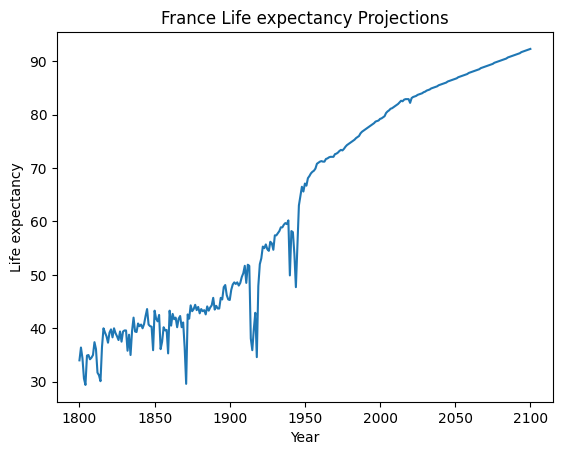

In [66]:
life_expect.loc['France'].plot(title="France Life expectancy Projections", ylabel="Life expectancy", xlabel="Year") # plot the life expectancy of France
plt.show()